# Heart Disease Prediction Using Logistic Regression With Exploratory Data Analysis

### Data Exploration and Analysis ###

Coronary artery disease is one of the most common causes of death for both men and women.  As people age, the incidence of coronary artery disease increases.  Thus, it is important to be able to predict the incidence of heart disease.

This dataset is from the UCI database describing baseline demographic characteristics and heart-related testing data.  The goal was to predict with the variables supplied whether or not heart disease was identified clinically.

__Dataset URL:__

https://archive.ics.uci.edu/ml/datasets/heart+disease


__Dataset Contributors:__

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

__Source Cited:__

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [153]:
#Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
import warnings

#Ignoring Warnings
warnings.filterwarnings('ignore')

#Importing our CSV file: heart.csv
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Description of Dataset and Variables: ###

__Age:__ Float

__Sex:__ Categorical (0 = Female, 1 = Male)

__CP:__ (Chest Pain Type): Categorical (0=Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic)

__trestbps:__ (Resting Systolic Blood Pressure - mmHG): Float

__chol (Cholesterol):__ Float

__fbs (Fasting Blood Sugar):__ Categorical (0=<120 and 1=>120)

__restecg (Resting EKG Findings):__  Categorical (0=Normal, 1 = ST/T-wave Abnormalities, 2 = Showing Probable or Definite LVH

__thalach (Max HR Achieved On Stress Test):__ Float

__exang (Exercise Induced Angina):__ Categorical (1=Yes, 0= No)

__oldpeak (ST depression induced by exercise):__  Float

__slope (Slope of ST Segment During Stress Testing):__ Categorical (0=Upsloping, 1 = Flat, 2 = Downsloping)

__ca (Number of Major Vesslels Imaged During Angiogram):__ Float

__thal (Measure of Heart Tissue Defects):__ Categorical (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect

__Target:__ Categorical (CAD Presence/Absence) 0 is Absent, 1 is Present - Target Variable


__There are 303 different data points as well as 14 separate variables, which includes the target variable.__

In [154]:
#Searching for Null Values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


__There are no null values in this dataset.__

In [155]:
#Checking Datatypes of Variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [156]:
#Recoding Variable Types - Sex, CP, fbs, restecg, exang, slope, and target as they are Categorical, Not Numeric

df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')

In [157]:
#Checking to Make Sure Encoded Correctly
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca             int64
thal        category
target      category
dtype: object

In [158]:
#Descriptive Statistics of Numerical Features of Dataframe
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


### Descriptive Analysis Summary of Numerical Variables

The oldest person in the dataset was 77 and the youngest was 29 years of age with mean age of 54.

The max systolic resting blood pressure on arrival to the hospital was 200 (this is quite high) and the lowest was 94 (on the lower end of normal).  Average systolic BP was 131 which is considered normal.

Max cholesterol reading was 564 (exceedingly high) and the lowest was 71, very low.  Of note, a low total cholesterol around 70 or less can be associated with excess mortality.  The mean cholesterol was 246 which is on the higher end.  Most authorities recommend total cholesterol to be 200 or less.

The oldpeak variable is a measure by how much the ST segment became depressed during a stress test.  This is indicative of ischemia or vulnerable heart tissue to a heart attack and the higher the number the worse it is.  In this case, there was 4 mm ST depresion (exceedingly high and worrisome) and the lowest was 0.  The mean value was 1 indicating many people did have some ST Depression.

The ca variable describes how many coronary blood vessels were imaged during an angiogram (the gold standard of determining heart disease).  The max was 4 (there are only 4 major branches of the coronary arteries) and the minimum was 0 meaning they were not imaged at all.

In [161]:
#Checking Descriptive Statistics of Categorical variables
df.describe(include=['category'])

,sex,cp,fbs,restecg,exang,slope,thal,target
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4,2
top,1,0,0,1,0,2,2,1
freq,207,143,258,152,204,142,166,165


### Descriptive Analysis of Categorical Variables

The most common values were males, fasting blood sugars <120, EKG showing ST/T abnormalities.  Most of the participants did not have exercise induced angina or chest pain on stress testing.  Further, the most common value for the target variable was confirmed heart disease.

### Visualization of Both Numeric and Categorical Variable Distributions

<Figure size 7200x7200 with 0 Axes>

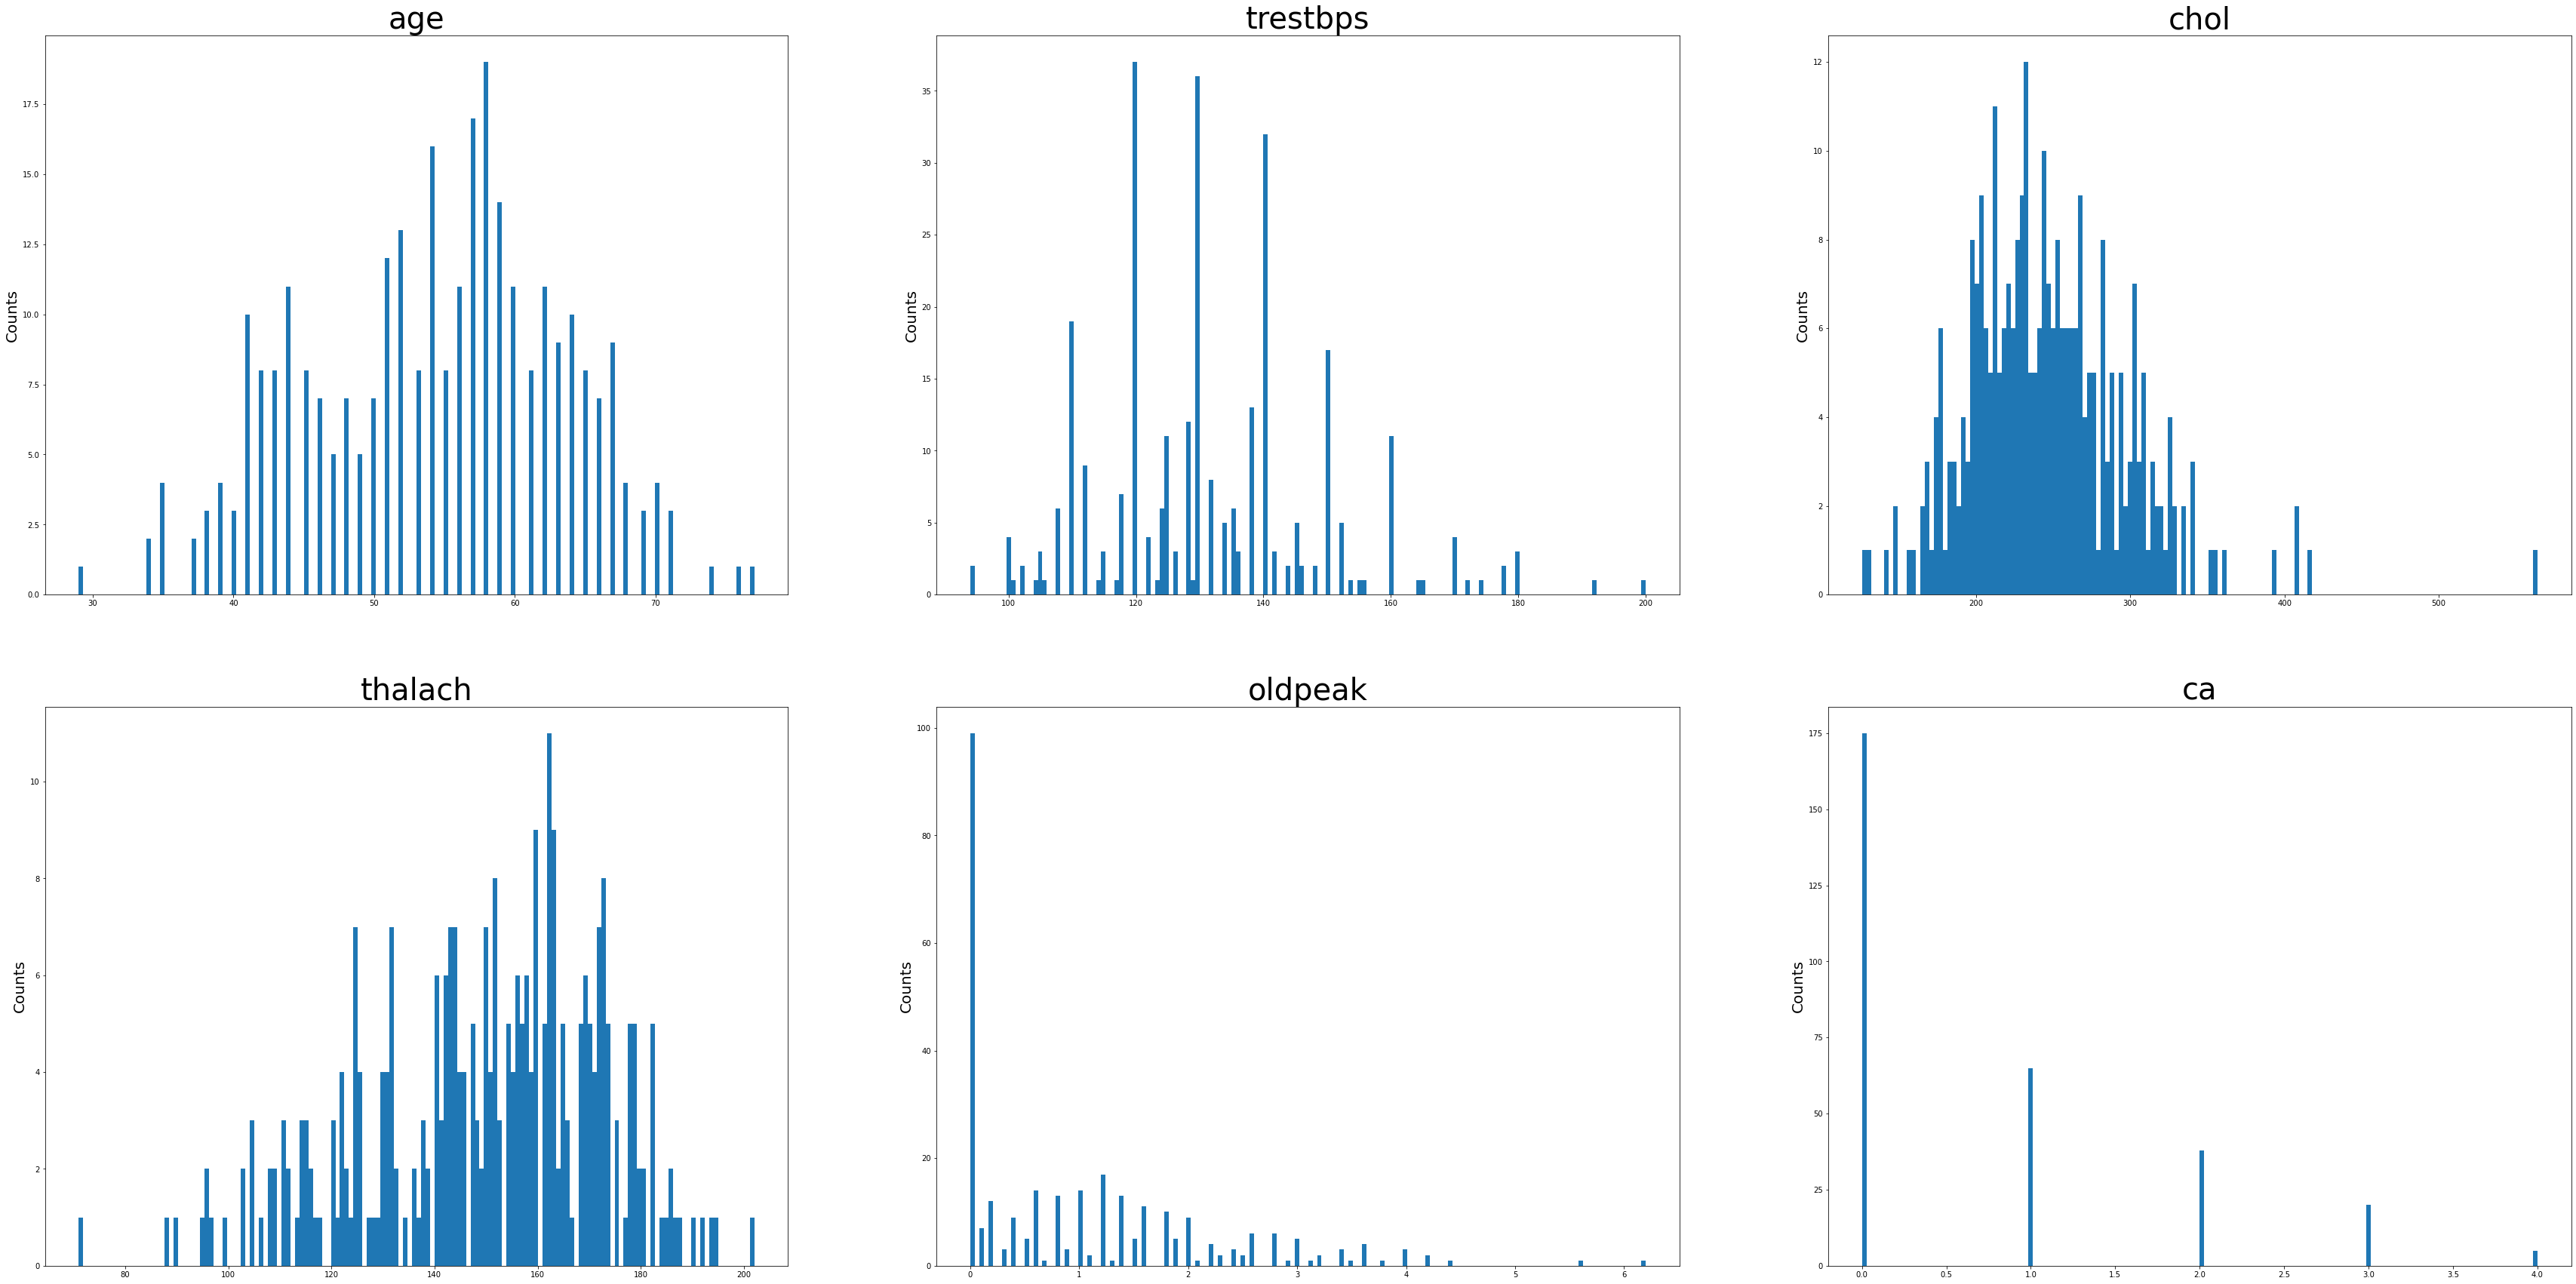

In [162]:
#Visualizing Distributions of Numerical Variables

#Creating Dataframe of Only Numerical Variables
df1 = df.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], axis = 1)

#Setting Figure Size
plt.figure(figsize=[100,100])

f,a = plt.subplots(2,3, figsize = (60, 30))

#Iterating Through Our Variables
a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(df1.iloc[:,idx], bins=150)
    ax.set_title(df1.columns[idx], size = 40)
    ax.set_ylabel('Counts', size = 20)
plt.show()

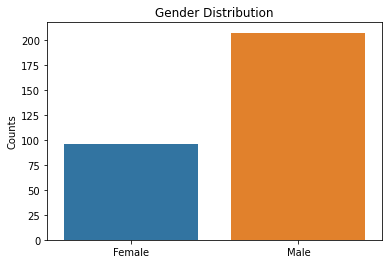

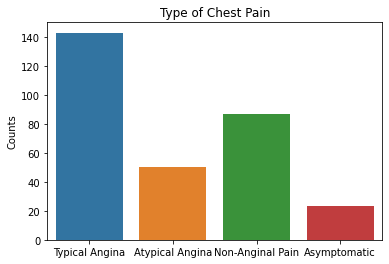

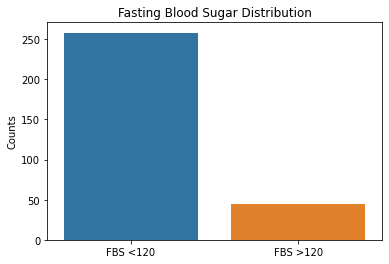

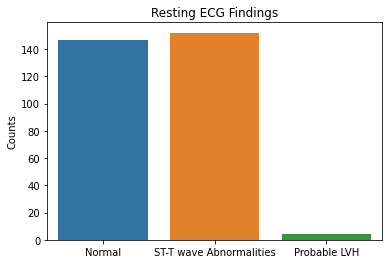

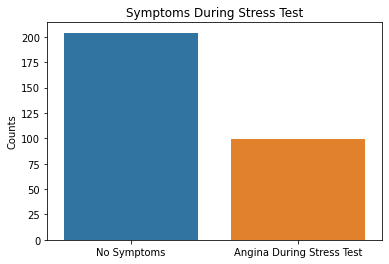

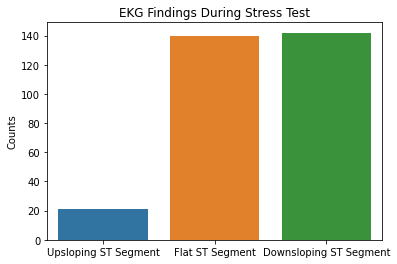

In [163]:
#Plotting Categorical Variables To Analyze Distributions

#Importing Seaborn
import seaborn as sns

#Creating Dataframe for Only Categorical Variables
df2 = df.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], axis = 1)

sns.countplot(x = sex, data = df2)
plt.title('Gender Distribution')
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.show()

sns.countplot(x = cp, data = df2)
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.title('Type of Chest Pain')
plt.show()

sns.countplot(x = fbs, data = df2)
plt.xticks([0,1], ['FBS <120', 'FBS >120'])
plt.xlabel(xlabel= None)
plt.ylabel('Counts')
plt.title('Fasting Blood Sugar Distribution')
plt.show()

sns.countplot(x = restecg, data = df2)
plt.xticks([0,1,2], ['Normal', 'ST-T wave Abnormalities', 'Probable LVH'])
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.title('Resting ECG Findings')
plt.show()

sns.countplot(x = exang, data = df2)
plt.xticks([0,1], ['No Symptoms', 'Angina During Stress Test'])
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.title('Symptoms During Stress Test')
plt.show()

sns.countplot(x = slope, data = df2)
plt.xticks([0,1,2], ['Upsloping ST Segment', 'Flat ST Segment', 'Downsloping ST Segment'])
plt.xlabel(xlabel = None)
plt.ylabel('Counts')
plt.title('EKG Findings During Stress Test')
plt.show()

Based on the results above, the majority of patient's tested were males, had typical angina, had fasting blood sugars <120, with either normal/ST-T changes noted on their EKG, and had no symptoms during the stress test.  Further EKG findings during the stress test showed either flat or downsloping ST segments.

These are important factors to note in that males as well as those with typical angina are more likely to have coronary artery disease based on pre-test probabilities so this raises questions that the patient population used in this dataset could have already had a higher likelihood of having CAD.

### Specialized Visualizations Including Probability Mass Functions, Cumulative Distribution Plots, And Probability Plots

In [164]:
#Subsetting Variables for CAD Presence and Absence To Visualize on PMF

cadpres = df[['target','chol']]
cadpresent = cadpres[cadpres.target == 1]
cadnegative = cadpres[cadpres.target != 1]

bpcad = df[['trestbps', 'target']]
cadpresent2 = bpcad[bpcad.target == 1]
cadnegative2 = bpcad[bpcad.target != 1]

agecad = df[['age', 'target']]
cadpresent3 = agecad[agecad.target == 1]
cadnegative3 = agecad[agecad.target != 1]

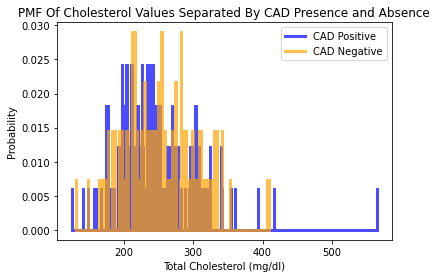

<Figure size 576x432 with 0 Axes>

In [165]:
#Generating PMF For CAD Presence and Absence with Cholesterol

width = 0.015

first_pmf = thinkstats2.Pmf(cadpresent['chol'])
other_pmf = thinkstats2.Pmf(cadnegative['chol'])

thinkplot.PrePlot(2)
thinkplot.Pmf(first_pmf, align = 'right', width = width, label = 'CAD Positive', color = 'blue')
thinkplot.Pmf(other_pmf, align = 'left', width = width, label = 'CAD Negative', color = 'orange')
thinkplot.Config(xlabel = 'Total Cholesterol (mg/dl)',
                ylabel = 'Probability')
thinkplot.Show(title = 'PMF Of Cholesterol Values Separated By CAD Presence and Absence'
               , xlabel = "Total Cholesterol (mg/dl)",)

Interestingly, when visualizing the distribution of cholesterol values and whether or not CAD was present or absent, there appears to be an association that there were higher cholesterol values with CAD confirmed as negative as opposed to positive.  This is counterintuitive as higher cholesterol levels are generally associated with development of coronary artery disease.

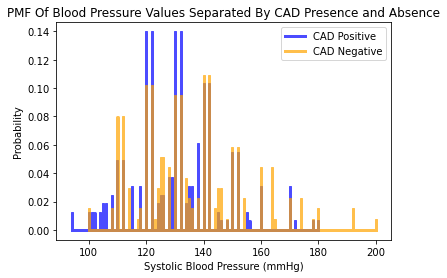

<Figure size 576x432 with 0 Axes>

In [166]:
#Generating PMF for Blood Pressure Values and CAD Presence/Absence
width = 0.015

first_pmf = thinkstats2.Pmf(cadpresent2['trestbps'])
other_pmf = thinkstats2.Pmf(cadnegative2['trestbps'])

thinkplot.PrePlot(2)
thinkplot.Pmf(first_pmf, align = 'right', width = width, label = 'CAD Positive', color = 'blue')
thinkplot.Pmf(other_pmf, align = 'left', width = width, label = 'CAD Negative', color = 'orange')
thinkplot.Config(xlabel = 'Systolic Blood Pressure (mmHg)',
                ylabel = 'Probability')
thinkplot.Show(title = 'PMF Of Blood Pressure Values Separated By CAD Presence and Absence'
               , xlabel = "Systolic Blood Pressure (mmHg)",)

The distribution for the systolic blood pressure values appear to be more or less the same between those diagnosed without CAD and those diagnosed without CAD.  There seems to be a significant proportion of individuals diagnosed with CAD at normal BPs (systolic BPs between 120 and 140).

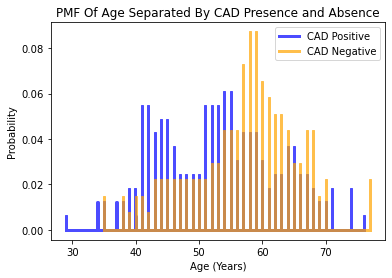

<Figure size 576x432 with 0 Axes>

In [167]:
#Generating PMF For Age and CAD Presence/Absence
width = 0.015

first_pmf = thinkstats2.Pmf(cadpresent3['age'])
other_pmf = thinkstats2.Pmf(cadnegative3['age'])

thinkplot.PrePlot(2)
thinkplot.Pmf(first_pmf, align = 'right', width = width, label = 'CAD Positive', color = 'blue')
thinkplot.Pmf(other_pmf, align = 'left', width = width, label = 'CAD Negative', color = 'orange')
thinkplot.Config(xlabel = 'Age (Years)',
                ylabel = 'Probability')
thinkplot.Show(title = 'PMF Of Age Separated By CAD Presence and Absence'
               , xlabel = "Age (Years)",)

Considering the variable for age, it appears that the older individuals in the dataset were more likely to NOT be diagnosed with CAD.  This is counterintuitive as the probability of developing CAD rises naturally with aging.

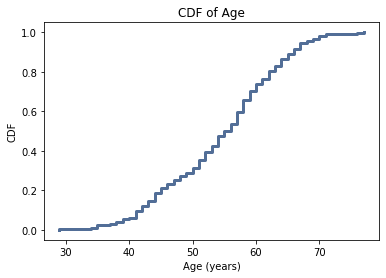

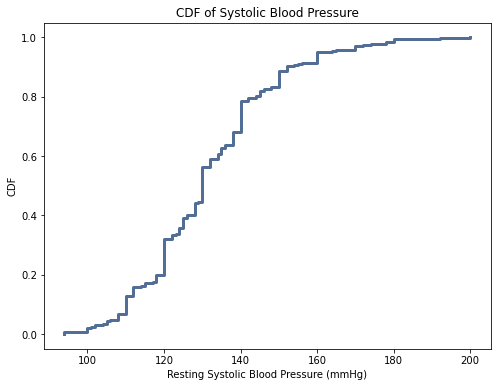

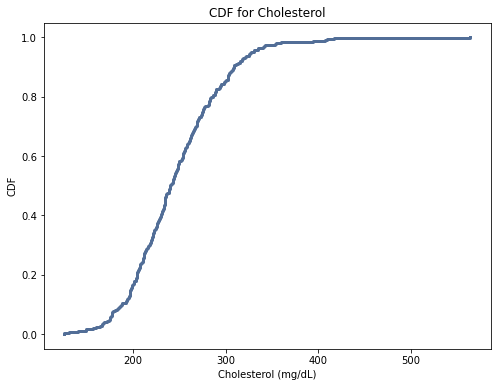

<Figure size 576x432 with 0 Axes>

In [168]:
#Plotting CDF for Age Breakdown
cdf1 = thinkstats2.Cdf(df.age)
thinkplot.Cdf(cdf1)
thinkplot.Show(title = 'CDF of Age', xlabel = "Age (years)", ylabel = "CDF")

#Plotting CDF for BP
cdf2 = thinkstats2.Cdf(df.trestbps)
thinkplot.Cdf(cdf2)
thinkplot.Show(title = 'CDF of Systolic Blood Pressure', xlabel = "Resting Systolic Blood Pressure (mmHg)", ylabel = "CDF")

#Plotting CDF for Cholesterol
cdf3 = thinkstats2.Cdf(df.chol)
thinkplot.Cdf(cdf3)
thinkplot.Show(title = 'CDF for Cholesterol', xlabel = "Cholesterol (mg/dL)", ylabel = "CDF")

For age, the CDF is essentially a straight line indicating a close to normal distribution.  The cholesterol variable, the middle line of the curve is steeper indicating a higher frequency of those values.  This suggests there were a larger proportion of elevated cholesterols as compared to lower cholesterols.

This could impact the analysis as it seems that the dataset has higher baseline cholesterol values so there would already be an increased likelihood of having CAD given those levels

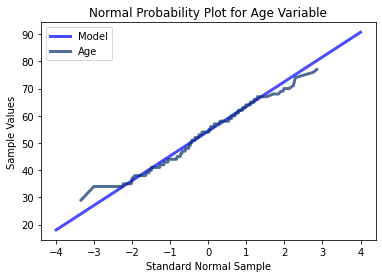

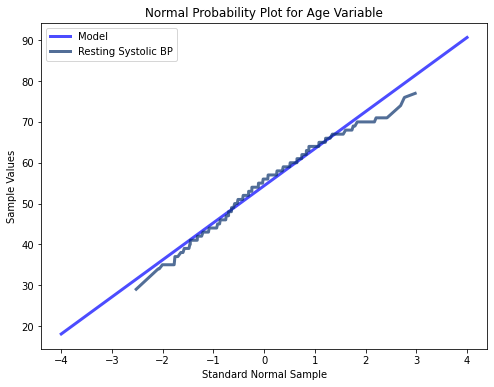

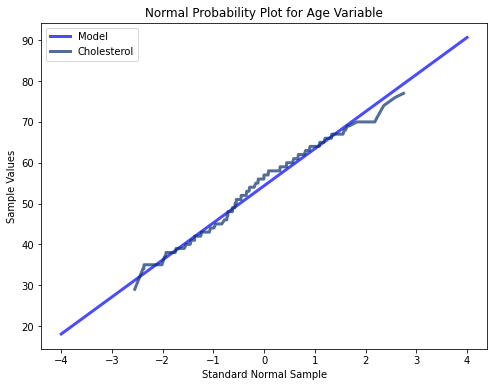

<Figure size 576x432 with 0 Axes>

In [169]:
#Plotting lognormal distribution for age variable
def MakeNormalPlot(age):
    mean = age.mean()
    std = age.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'blue', label = 'Model')
    
    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label = 'Age')
    thinkplot.Show(title = 'Normal Probability Plot for Age Variable', xlabel = 'Standard Normal Sample', ylabel = 'Sample Values')
    
MakeNormalPlot(age)

#Plotting lognormal distribution for BP variable
def MakeNormalPlot1(resting_bp):
    mean = age.mean()
    std = age.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'blue', label = 'Model')
    
    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label = 'Resting Systolic BP')
    thinkplot.Show(title = 'Normal Probability Plot for Age Variable', xlabel = 'Standard Normal Sample', ylabel = 'Sample Values')
    
MakeNormalPlot1(resting_bp)

#Plotting lognormal distribution for Chol variable
def MakeNormalPlot2(chol):
    mean = age.mean()
    std = age.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'blue', label = 'Model')
    
    xs, ys = thinkstats2.NormalProbability(age)
    thinkplot.Plot(xs, ys, label = 'Cholesterol')
    thinkplot.Show(title = 'Normal Probability Plot for Age Variable', xlabel = 'Standard Normal Sample', ylabel = 'Sample Values')
    
MakeNormalPlot2(chol)

The three variables tested here using probability plots all appear to follow a mostly normal distribution indicated by their minimal deviations from a straight line.  At the extreme values however, there are more significant deviations.  Thus for middle range values, the extreme values in the tails of all three of the different variables may cause instability in our modeling algorithms.

### Generating Scatterplots Between Variables and Assessing For High Levels of Correlation

In [170]:
#Getting Correlation Matrix Based on Our Variables

#Generating Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682
ca,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000


In [171]:
#Selecting Upper Triangle of Correlation Matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Finding Index of Highly Correlated Variables (Correlation >0.95)
to_drop = [column for column in upper.columns if any (upper[column] > 0.95)]

There are no highly correlated variables with correlation value > 0.95.

([<matplotlib.axis.XTick at 0x1c5d1b35370>,
 [Text(0, 0, 'No Heart Disease'), Text(0, 0, 'Heart Disease')])

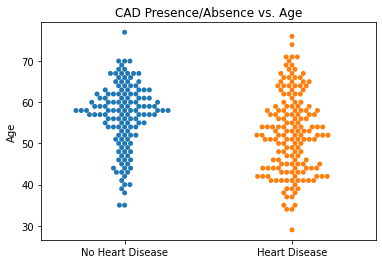

In [172]:
#Generating Swarm Plots for Our Predictors vs. our Target Variable

#Setting Category Variable
categories = df.target

#Plotting Age vs. CAD
sns.swarmplot(categories, df.age)
plt.title('CAD Presence/Absence vs. Age')
plt.xlabel(xlabel = None)
plt.ylabel('Age')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])

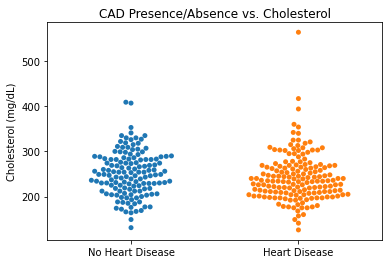

In [173]:
#Plotting Cholesterol vs CAD
sns.swarmplot(categories, df.chol)
plt.title('CAD Presence/Absence vs. Cholesterol')
plt.ylabel('Cholesterol (mg/dL)')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.show()

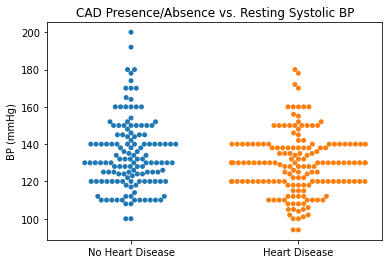

In [174]:
#Plotting Resting BP vs. CAD
sns.swarmplot(categories, df.trestbps)
plt.title('CAD Presence/Absence vs. Resting Systolic BP')
plt.ylabel('BP (mmHg)')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.show()

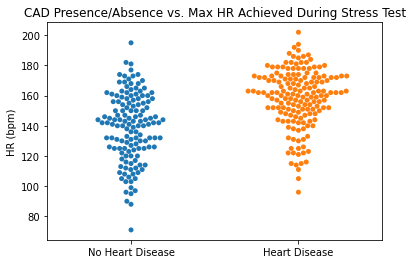

In [175]:
#Plotting Max HR Achieved vs. CAD
sns.swarmplot(categories, df.thalach)
plt.title('CAD Presence/Absence vs. Max HR Achieved During Stress Test')
plt.ylabel('HR (bpm)')
plt.xlabel(xlabel = None)
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.show()


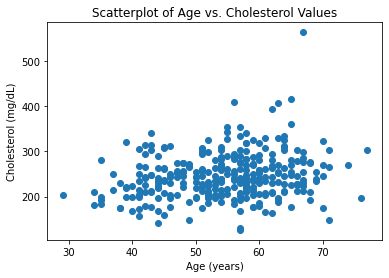

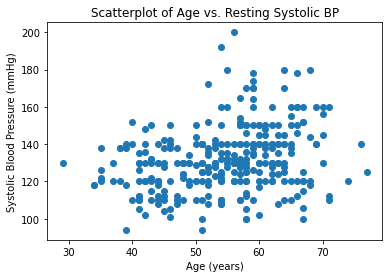

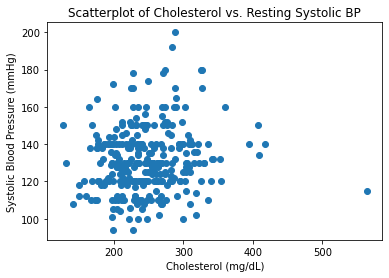

In [176]:
#Generating Scatter Plot Between Age and Cholesterol
plt.scatter(age, chol)
plt.title('Scatterplot of Age vs. Cholesterol Values')
plt.xlabel('Age (years)')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

#Generating Scatterplot Between Age and BP
plt.scatter(age, resting_bp)
plt.title('Scatterplot of Age vs. Resting Systolic BP')
plt.xlabel('Age (years)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

#Generating Scatterplot Between Cholesterol and BP
plt.scatter(chol, resting_bp)
plt.title('Scatterplot of Cholesterol vs. Resting Systolic BP')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

As expected, these variables are positively correlated with one another and verify common associations that as you age, your BP and cholesterol values increase.  Likewise, there is a known association between increased cholesterol values and increased blood pressure.

### Using Logistic Regression Model To Predict Heart Disease

In [179]:
#Importing Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#Creating Features and Target Object
features = df.drop('target', axis = 1)
target = df.target

#Getting Dummy Variables for Categoricals
features_new = pd.get_dummies(features)

#Creating Standardizer
standardizer = StandardScaler()

#Creating Logistic Regression Object
logit = LogisticRegression()

#Standardizing Features
features_standardized = standardizer.fit_transform(features_new)

#Train Test 80/20 Split
features_train, features_test, target_train, target_test = train_test_split(features_standardized, target, test_size = 0.2)

#Fitting Data to Logit
logreg = logit.fit(features_train, target_train)

#Generating Confusion Matrix and Classification Report
target_pred = logit.predict(features_test)
test0 = np.array(target_test)
predictions0 = np.array(target_pred)
print("Confusion Matrix:\n", confusion_matrix(test0, predictions0), '\n')
print("Classification Report:\n", classification_report(test0, predictions0))

Confusion Matrix:
 [[25  3]
 [ 7 26]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



This model performed reasonably well.  There were some misclassifications.  There were 7 classified as having heart disease when they did not have heart disease.  Further, there were 3 classified as not having heart disease when they indeed did have heart disease.  The F1 score was slightly higher for predicting heart disease as opposed to not.  However, the score was not above 90%.

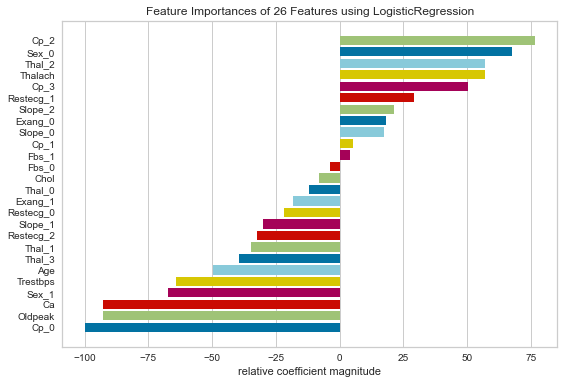

In [181]:
#Checking Feature Importance Based on Coefficients

#Importing Packages
from yellowbrick.model_selection import FeatureImportances

#Getting Labels and Checking Feature Importance
labels = list(map(lambda x: x.title(), features_new))
viz = FeatureImportances(logreg, labels = labels)
viz.fit(features_train, features_test)
viz.show()

Looking at some of the most important features in this logistic regression model, non-anginal pain or being asymptomatic, female sex, max HR obtained during stress test, downsloping ST segments, and anginal pain.

Considering factors traditionally associated with having a higher probability of heart disease, anginal pain, downsloping ST segments, and max HR obtained during stress test are predictive of CAD.  Those with angina (typical CAD related pain) and those with lower Max HR during stress tests are more likely to have CAD.  Interestingly enough, female sex was also considered very important as was non-anginal pain.  This is counter intuitive.  This could simply be a result of the population tested in the dataset if not represented of a homogeneous population.

However, this does suggest that other types of machine learning algorithms may be useful in predicting heart disease.